# Multi-Campaign Creative Metrics Analysis

This notebook demonstrates how to analyze and compare creative metrics across multiple D&D campaigns using advanced NLP techniques.

## Features
- Semantic distance analysis across campaigns
- Session novelty comparison
- Topic modeling and transition analysis
- Cross-campaign creativity correlations
- Statistical comparisons and distributions
- **Improved caching system** with creativity-specific cache files

## Caching System
The creative metrics analysis uses a separate caching infrastructure from basic metrics:

- **Creativity-specific cache files**: `creativity_analysis_N_campaigns.pkl`
- **Separate cache directories**: Avoids conflicts with basic metrics cache
- **Incremental computation**: Reuses existing results for efficiency
- **Smart cache loading**: Finds the best existing cache to build from

## Requirements
Make sure you have installed all requirements:
```bash
pip install -r requirements.txt
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from creative_metrics import analyze_creativity_all_campaigns, aggregate_creativity_metrics
import os
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create plots directory if it doesn't exist
os.makedirs('Plots', exist_ok=True)

print("Setup complete!")

Setup complete!


## 1. Load and Analyze Multiple Campaigns

First, let's analyze creative metrics across multiple campaigns. We'll start with a small sample for demonstration purposes.

In [2]:
# Analyze creativity across multiple campaigns using the improved caching system
# The new system uses creativity-specific cache files separate from basic metrics
print("Analyzing creative metrics across campaigns...")

# Option 1: Use the basic analyze function (creates creativity_cache/ directory)
creativity_results = analyze_creativity_all_campaigns(
    data_file_path='Game-Data/data-labels.json',
    max_campaigns=5,  # Start small for demo
    cache_dir='creativity_cache',  # Separate from basic metrics cache
    force_refresh=False,
    show_progress=True
)

# Option 2: Use the incremental function for more efficient caching
# (Uncomment the lines below to use the advanced incremental caching)
"""
from creative_metrics import load_or_compute_creativity_incremental
creativity_results = load_or_compute_creativity_incremental(
    max_campaigns=5,
    data_file_path='Game-Data/data-labels.json',
    cache_dir='campaign_stats_cache',  # Uses standard cache directory with creativity_ prefix
    force_refresh=False,
    show_progress=True
)
"""

print(f"\nAnalyzed {len(creativity_results)} campaigns")
print("\nCampaigns analyzed:")
for campaign_id, results in creativity_results.items():
    if results and 'metadata' in results:
        meta = results['metadata']
        print(f"  {campaign_id}: {meta['total_messages']} messages, {meta['unique_players']} players")

Analyzing creative metrics across campaigns...
Loaded cached results for 5 campaigns from creativity_cache/creativity_analysis_5_campaigns.pkl

Analyzed 5 campaigns

Campaigns analyzed:
  9701-coliseum-of-conquest-no-longer-recruiting: 18109 messages, 139 players
  7921-storm-kings-thunder: 13084 messages, 13 players
  897-the-gm-o-a-t-s-sunless-citadel-beyond-the-wild-pbp: 1 messages, 1 players
  35444-lost-mines-lost-labs-and-lost-hope-robjfalcons: 4289 messages, 7 players
  13325-lost-magics-epic-of-pre-made-proportions: 4189 messages, 7 players


## 2. Aggregate Results for Cross-Campaign Analysis

In [11]:
# Aggregate creativity metrics across all campaigns
print("Aggregating results across campaigns...")
aggregated = aggregate_creativity_metrics(creativity_results)

print("\n=== CROSS-CAMPAIGN CREATIVITY SUMMARY ===")
summary = aggregated['summary']
print(f"Total campaigns analyzed: {summary['total_campaigns_analyzed']}")
print(f"Campaigns with semantic analysis: {summary['campaigns_with_semantic_analysis']}")
print(f"Campaigns with novelty analysis: {summary['campaigns_with_novelty_analysis']}")
print(f"Campaigns with topic analysis: {summary['campaigns_with_topic_analysis']}")
print(f"Total messages across all campaigns: {summary['total_messages_across_all_campaigns']}")

# Display cross-campaign statistics
print("\n=== CROSS-CAMPAIGN STATISTICS ===")
for metric_name, stats in aggregated['cross_campaign_stats'].items():
    print(f"\n{metric_name.replace('_', ' ').title()}:")
    print(f"  Mean: {stats['mean']:.4f}")
    print(f"  Std:  {stats['std']:.4f}")
    print(f"  Min:  {stats['min']:.4f}")
    print(f"  Max:  {stats['max']:.4f}")
    print(f"  Campaigns: {stats['campaigns_analyzed']}")

Aggregating results across campaigns...

=== CROSS-CAMPAIGN CREATIVITY SUMMARY ===
Total campaigns analyzed: 5
Campaigns with semantic analysis: 4
Campaigns with novelty analysis: 0
Campaigns with topic analysis: 4
Total messages across all campaigns: 39672

=== CROSS-CAMPAIGN STATISTICS ===

Semantic Distance:
  Mean: 0.6236
  Std:  0.0323
  Min:  0.5739
  Max:  0.6636
  Campaigns: 4

Topic Change Rate:
  Mean: 0.7318
  Std:  0.0401
  Min:  0.6721
  Max:  0.7839
  Campaigns: 4


## 3. Visualize Creative Metrics Distributions

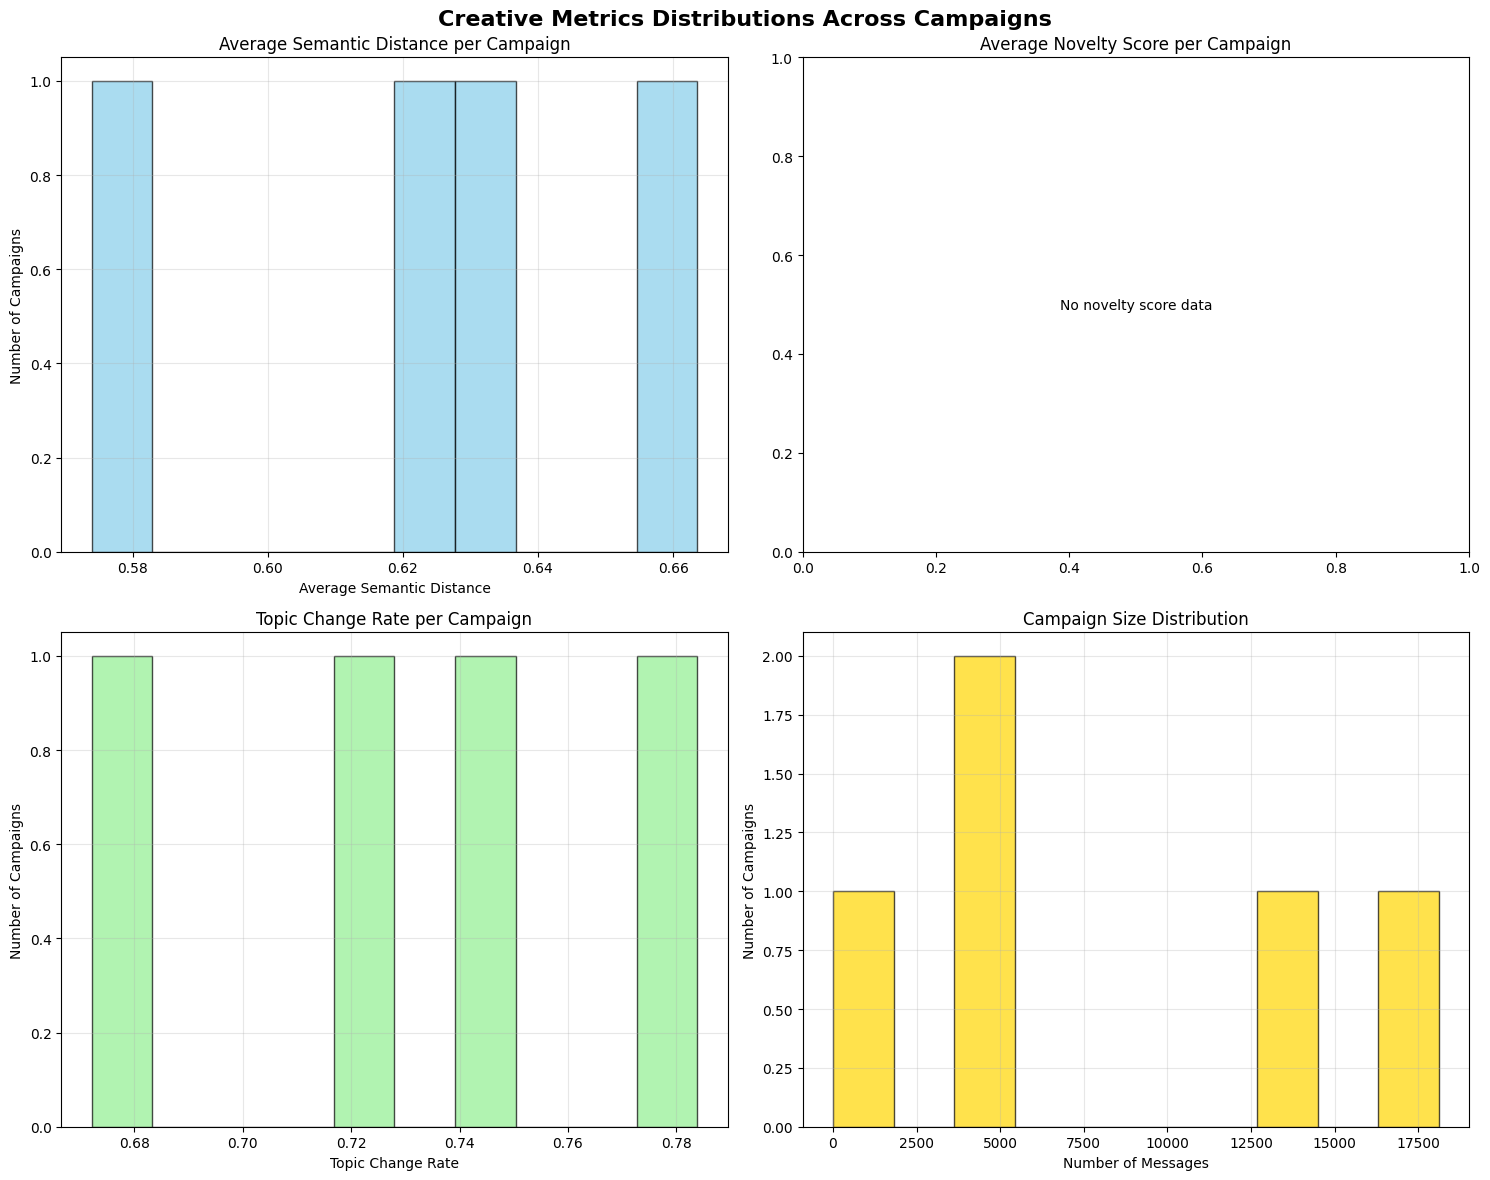

Saved creativity distributions plot to Plots/creativity_distributions.png


In [12]:
# Plot distributions of creative metrics
distributions = aggregated['distributions']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Creative Metrics Distributions Across Campaigns', fontsize=16, fontweight='bold')

# Semantic distances
if distributions['semantic_distances']:
    axes[0, 0].hist(distributions['semantic_distances'], bins=10, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Average Semantic Distance per Campaign')
    axes[0, 0].set_xlabel('Average Semantic Distance')
    axes[0, 0].set_ylabel('Number of Campaigns')
    axes[0, 0].grid(True, alpha=0.3)
else:
    axes[0, 0].text(0.5, 0.5, 'No semantic distance data', ha='center', va='center', transform=axes[0, 0].transAxes)
    axes[0, 0].set_title('Average Semantic Distance per Campaign')

# Novelty scores
if distributions['novelty_scores']:
    axes[0, 1].hist(distributions['novelty_scores'], bins=10, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[0, 1].set_title('Average Novelty Score per Campaign')
    axes[0, 1].set_xlabel('Average Novelty Score')
    axes[0, 1].set_ylabel('Number of Campaigns')
    axes[0, 1].grid(True, alpha=0.3)
else:
    axes[0, 1].text(0.5, 0.5, 'No novelty score data', ha='center', va='center', transform=axes[0, 1].transAxes)
    axes[0, 1].set_title('Average Novelty Score per Campaign')

# Topic change rates
if distributions['topic_change_rates']:
    axes[1, 0].hist(distributions['topic_change_rates'], bins=10, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[1, 0].set_title('Topic Change Rate per Campaign')
    axes[1, 0].set_xlabel('Topic Change Rate')
    axes[1, 0].set_ylabel('Number of Campaigns')
    axes[1, 0].grid(True, alpha=0.3)
else:
    axes[1, 0].text(0.5, 0.5, 'No topic change rate data', ha='center', va='center', transform=axes[1, 0].transAxes)
    axes[1, 0].set_title('Topic Change Rate per Campaign')

# Campaign sizes
if distributions['campaign_sizes']:
    axes[1, 1].hist(distributions['campaign_sizes'], bins=10, alpha=0.7, color='gold', edgecolor='black')
    axes[1, 1].set_title('Campaign Size Distribution')
    axes[1, 1].set_xlabel('Number of Messages')
    axes[1, 1].set_ylabel('Number of Campaigns')
    axes[1, 1].grid(True, alpha=0.3)
else:
    axes[1, 1].text(0.5, 0.5, 'No campaign size data', ha='center', va='center', transform=axes[1, 1].transAxes)
    axes[1, 1].set_title('Campaign Size Distribution')

plt.tight_layout()
plt.savefig('Plots/creativity_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved creativity distributions plot to Plots/creativity_distributions.png")

## 4. Campaign-by-Campaign Comparison

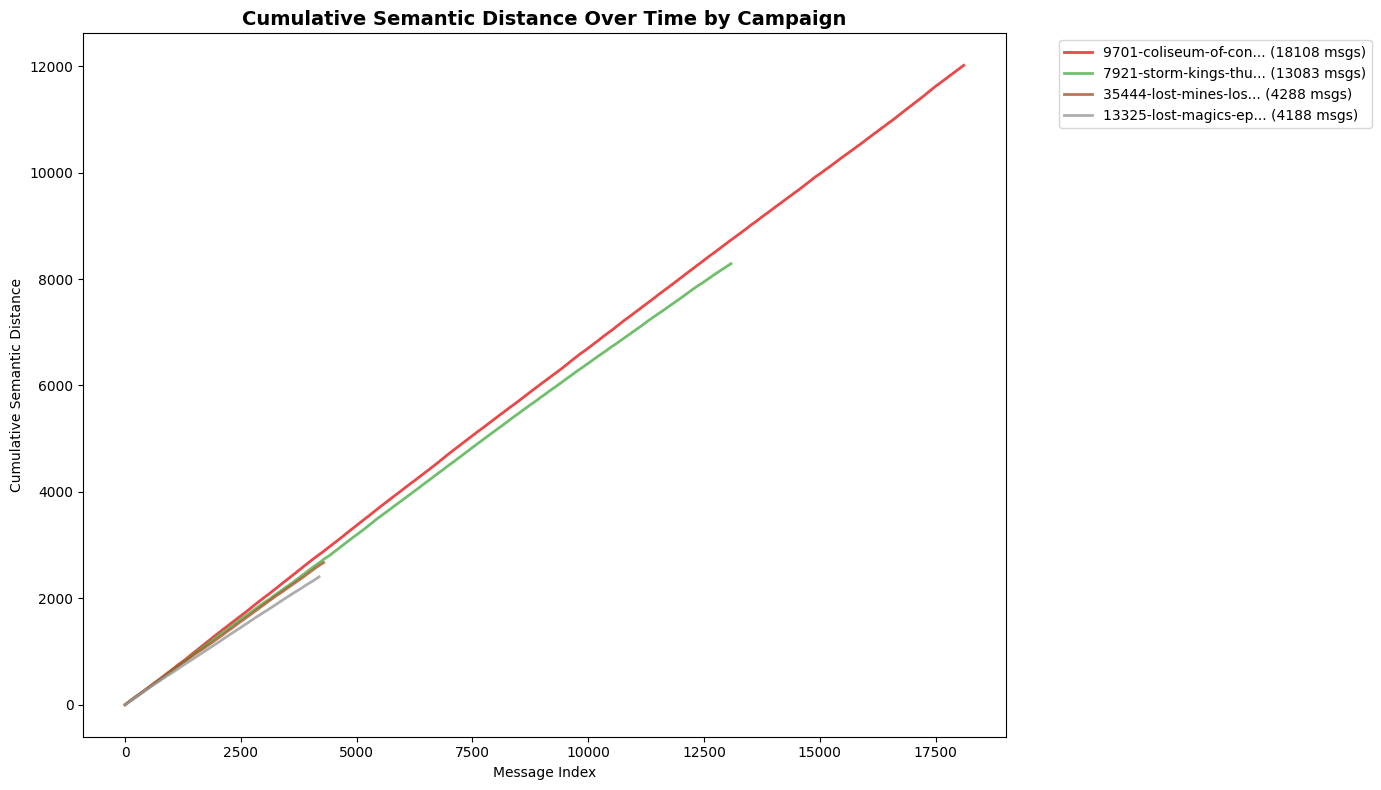

Saved cumulative semantic distance plot to Plots/cumulative_semantic_distance.png


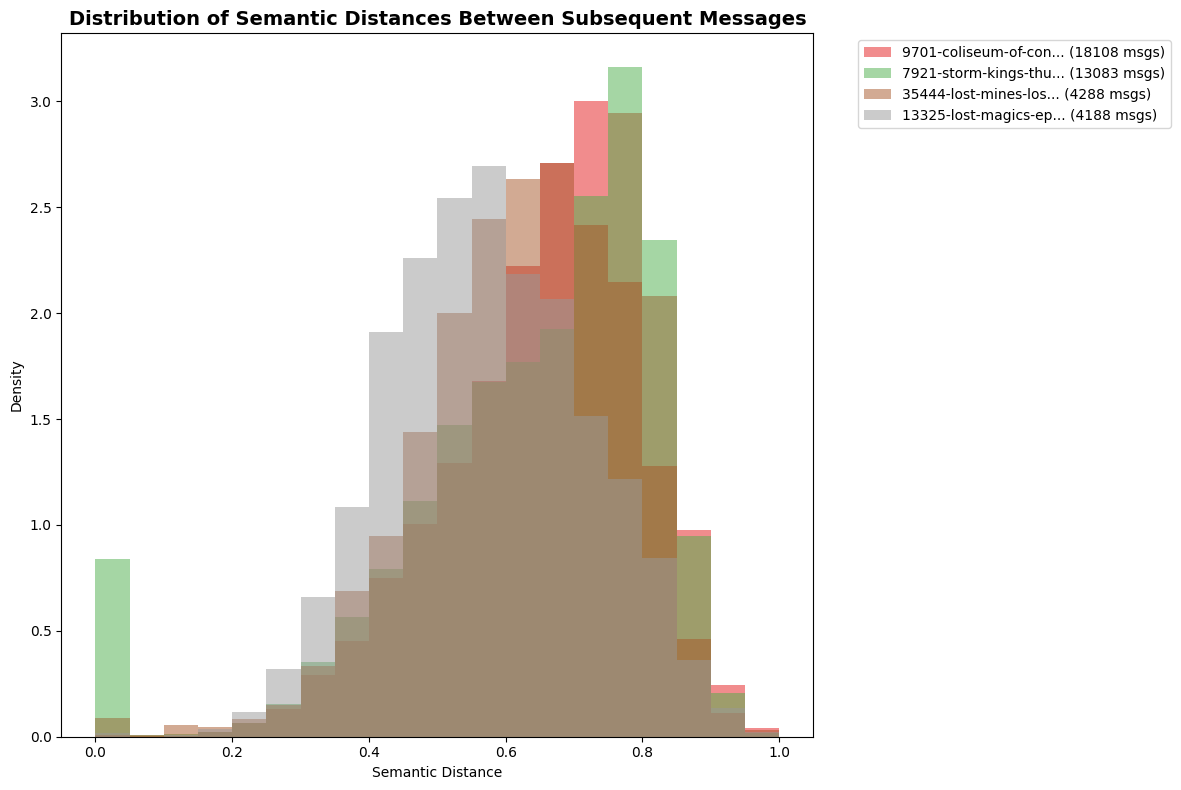

Saved semantic distance distributions plot to Plots/semantic_distance_distributions.png

=== CUMULATIVE SEMANTIC DISTANCE SUMMARY ===
9701-coliseum-of-conquest-no-l...:
  Total cumulative distance: 12016.1078
  Average per-message distance: 0.6636
  Standard deviation: 0.1469
  Range: 0.0000 to 1.0000
  Messages analyzed: 18108
7921-storm-kings-thunder:
  Total cumulative distance: 8288.7230
  Average per-message distance: 0.6335
  Standard deviation: 0.1972
  Range: 0.0000 to 1.0000
  Messages analyzed: 13083
35444-lost-mines-lost-labs-and...:
  Total cumulative distance: 2672.5738
  Average per-message distance: 0.6233
  Standard deviation: 0.1418
  Range: 0.0000 to 1.0000
  Messages analyzed: 4288
13325-lost-magics-epic-of-pre-...:
  Total cumulative distance: 2403.6701
  Average per-message distance: 0.5739
  Standard deviation: 0.1457
  Range: 0.0000 to 1.0000
  Messages analyzed: 4188


In [ ]:
# Campaign-by-Campaign Comparison: Cumulative Semantic Distance Over Time

campaign_summaries = aggregated['campaign_summaries']
campaign_ids = list(campaign_summaries.keys())

if len(campaign_ids) > 0:
    # Create cumulative semantic distance plot for all campaigns
    plt.figure(figsize=(14, 8))

    colors = plt.cm.Set1(np.linspace(0, 1, len(campaign_ids)))

    for i, campaign_id in enumerate(campaign_ids):
        if campaign_id in creativity_results and creativity_results[
                campaign_id] is not None:
            results = creativity_results[campaign_id]

            # Get semantic distances for this campaign
            if 'semantic_distances' in results and results[
                    'semantic_distances'] is not None:
                distances = results['semantic_distances']

                # Calculate cumulative semantic distance
                # Handle NaN values in the first few entries (window < actual index)
                distances_array = np.array(distances)
                valid_distances = distances_array[~np.isnan(distances_array)]

                if len(valid_distances) > 0:
                    # Create cumulative sum of valid distances
                    cumulative_distances = np.cumsum(valid_distances)

                    # Create x-axis (message index)
                    x_values = range(len(cumulative_distances))

                    # Plot cumulative semantic distance for this campaign
                    campaign_label = campaign_id[:20] + '...' if len(
                        campaign_id) > 20 else campaign_id
                    plt.plot(
                        x_values,
                        cumulative_distances,
                        color=colors[i],
                        linewidth=2,
                        alpha=0.8,
                        label=f'{campaign_label} ({len(valid_distances)} msgs)'
                    )

    plt.title('Cumulative Semantic Distance Over Time by Campaign',
              fontsize=14,
              fontweight='bold')
    plt.xlabel('Message Index')
    plt.ylabel('Cumulative Semantic Distance')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig('Plots/cumulative_semantic_distance.png',
                dpi=300,
                bbox_inches='tight')
    sns.despine()
    plt.show()

    print(
        "Saved cumulative semantic distance plot to Plots/cumulative_semantic_distance.png"
    )

    # Second plot: Distribution of distances between subsequent messages
    plt.figure(figsize=(12, 8))

    # Use the same colors for consistency
    for i, campaign_id in enumerate(campaign_ids):
        if campaign_id in creativity_results and creativity_results[
                campaign_id] is not None:
            results = creativity_results[campaign_id]

            # Get semantic distances for this campaign
            if 'semantic_distances' in results and results[
                    'semantic_distances'] is not None:
                distances = results['semantic_distances']

                # Get valid distances (remove NaN values)
                distances_array = np.array(distances)
                valid_distances = distances_array[~np.isnan(distances_array)]

                if len(valid_distances) > 0:
                    # Create histogram for this campaign
                    campaign_label = campaign_id[:20] + '...' if len(
                        campaign_id) > 20 else campaign_id
                    plt.hist(
                        valid_distances,
                        bins=20,
                        alpha=0.5,
                        color=colors[i],
                        label=f'{campaign_label} ({len(valid_distances)} msgs)',
                        density=True)  # Normalize for better comparison

    plt.title('Distribution of Semantic Distances Between Subsequent Messages',
              fontsize=14,
              fontweight='bold')
    plt.xlabel('Semantic Distance')
    plt.ylabel('Density')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig('Plots/semantic_distance_distributions.png',
                dpi=300,
                bbox_inches='tight')
    plt.show()

    print(
        "Saved semantic distance distributions plot to Plots/semantic_distance_distributions.png"
    )

    # Summary statistics for both plots
    print(f"\n=== CUMULATIVE SEMANTIC DISTANCE SUMMARY ===")
    for campaign_id in campaign_ids:
        if campaign_id in creativity_results and creativity_results[
                campaign_id] is not None:
            results = creativity_results[campaign_id]
            if 'semantic_distances' in results and results[
                    'semantic_distances'] is not None:
                distances = results['semantic_distances']
                distances_array = np.array(distances)
                valid_distances = distances_array[~np.isnan(distances_array)]

                if len(valid_distances) > 0:
                    total_distance = np.sum(valid_distances)
                    avg_distance = np.mean(valid_distances)
                    std_distance = np.std(valid_distances)
                    min_distance = np.min(valid_distances)
                    max_distance = np.max(valid_distances)
                    campaign_short = campaign_id[:30] + '...' if len(
                        campaign_id) > 30 else campaign_id
                    print(f"{campaign_short}:")
                    print(f"  Total cumulative distance: {total_distance:.4f}")
                    print(
                        f"  Average per-message distance: {avg_distance:.4f}")
                    print(f"  Standard deviation: {std_distance:.4f}")
                    print(f"  Range: {min_distance:.4f} to {max_distance:.4f}")
                    print(f"  Messages analyzed: {len(valid_distances)}")
else:
    print("No campaigns available for cumulative semantic distance analysis")

## 5. Correlation Analysis

In [15]:
# Cross-Campaign Metrics Summary

# Display summary statistics across all campaigns
print("=== CROSS-CAMPAIGN CREATIVITY METRICS SUMMARY ===")
print()

# Show available metrics and their coverage
summary = aggregated['summary']
print(f"Total campaigns analyzed: {summary['total_campaigns_analyzed']}")
print(f"Campaigns with semantic analysis: {summary['campaigns_with_semantic_analysis']}")
print(f"Campaigns with novelty analysis: {summary['campaigns_with_novelty_analysis']}")
print(f"Campaigns with topic analysis: {summary['campaigns_with_topic_analysis']}")
print(f"Total messages across all campaigns: {summary['total_messages_across_all_campaigns']}")
print()

# Show cross-campaign statistics for each metric
if 'cross_campaign_stats' in aggregated:
    print("=== CROSS-CAMPAIGN STATISTICS ===")
    for metric_name, stats in aggregated['cross_campaign_stats'].items():
        print(f"\\n{metric_name.replace('_', ' ').title()}:")
        print(f"  Mean: {stats['mean']:.4f}")
        print(f"  Std:  {stats['std']:.4f}")
        print(f"  Range: {stats['min']:.4f} to {stats['max']:.4f}")
        print(f"  Median: {stats['median']:.4f}")
        print(f"  Campaigns analyzed: {stats['campaigns_analyzed']}")

# Show data availability for each campaign
print()
print("=== DATA AVAILABILITY BY CAMPAIGN ===")
campaign_summaries = aggregated['campaign_summaries']
for campaign_id, summary in campaign_summaries.items():
    campaign_short = campaign_id[:40] + '...' if len(campaign_id) > 40 else campaign_id
    print(f"\\n{campaign_short}:")
    print(f"  Messages: {summary['total_messages']}")
    print(f"  Players: {summary['unique_players']}")
    
    # Check which metrics are available
    available_metrics = []
    if summary['avg_semantic_distance'] is not None:
        available_metrics.append("semantic distance")
    if summary['avg_novelty_score'] is not None:
        available_metrics.append("novelty")
    if summary['topic_change_rate'] is not None:
        available_metrics.append("topic change rate")
    
    if available_metrics:
        print(f"  Available metrics: {', '.join(available_metrics)}")
    else:
        print(f"  Available metrics: none (likely missing NLP dependencies)")

print()
print("NOTE: Some campaigns may show 'none' for available metrics if NLP dependencies")
print("(sentence-transformers, bertopic, etc.) are not installed.")

=== CROSS-CAMPAIGN CREATIVITY METRICS SUMMARY ===

Total campaigns analyzed: 5
Campaigns with semantic analysis: 4
Campaigns with novelty analysis: 0
Campaigns with topic analysis: 4
Total messages across all campaigns: 39672

=== CROSS-CAMPAIGN STATISTICS ===
\nSemantic Distance:
  Mean: 0.6236
  Std:  0.0323
  Range: 0.5739 to 0.6636
  Median: 0.6284
  Campaigns analyzed: 4
\nTopic Change Rate:
  Mean: 0.7318
  Std:  0.0401
  Range: 0.6721 to 0.7839
  Median: 0.7357
  Campaigns analyzed: 4

=== DATA AVAILABILITY BY CAMPAIGN ===
\n9701-coliseum-of-conquest-no-longer-recr...:
  Messages: 18109
  Players: 139
  Available metrics: semantic distance, topic change rate
\n7921-storm-kings-thunder:
  Messages: 13084
  Players: 13
  Available metrics: semantic distance, topic change rate
\n897-the-gm-o-a-t-s-sunless-citadel-beyon...:
  Messages: 1
  Players: 1
  Available metrics: none (likely missing NLP dependencies)
\n35444-lost-mines-lost-labs-and-lost-hope...:
  Messages: 4289
  Players:

## 6. Detailed Campaign Analysis

Let's examine the creative metrics for each campaign in detail.

In [16]:
# Detailed analysis of individual campaigns
print("=== DETAILED CAMPAIGN ANALYSIS ===")

for campaign_id, results in creativity_results.items():
    if results is None:
        continue
        
    print(f"\n--- Campaign: {campaign_id} ---")
    
    # Metadata
    if 'metadata' in results:
        meta = results['metadata']
        print(f"Total messages: {meta['total_messages']}")
        print(f"Unique players: {meta['unique_players']}")
        if meta['date_range']['start']:
            print(f"Date range: {meta['date_range']['start'][:10]} to {meta['date_range']['end'][:10]}")
    
    # Semantic analysis
    if 'semantic_distances' in results and results['semantic_distances'] is not None:
        distances = results['semantic_distances']
        print(f"Semantic distances: avg={np.mean(distances):.4f}, std={np.std(distances):.4f}")
        print(f"  Range: {np.min(distances):.4f} to {np.max(distances):.4f}")
    
    # Novelty analysis
    if 'session_novelty' in results and results['session_novelty'] is not None:
        novelty = results['session_novelty']
        if isinstance(novelty, dict) and 'novelty_scores' in novelty:
            scores = novelty['novelty_scores']
            print(f"Novelty scores: avg={np.mean(scores):.4f}, std={np.std(scores):.4f}")
            print(f"  Range: {np.min(scores):.4f} to {np.max(scores):.4f}")
    
    # Topic analysis
    if 'topic_model' in results and results['topic_model'] is not None:
        topics = results['topic_model']
        if isinstance(topics, dict) and 'topics' in topics:
            unique_topics = len(set(topics['topics']))
            print(f"Topics discovered: {unique_topics}")
            
            if 'topic_change_rate' in results and results['topic_change_rate'] is not None:
                change_rate = results['topic_change_rate']
                if isinstance(change_rate, dict) and 'overall_rate' in change_rate:
                    print(f"Topic change rate: {change_rate['overall_rate']:.4f}")
    
    print()

=== DETAILED CAMPAIGN ANALYSIS ===

--- Campaign: 9701-coliseum-of-conquest-no-longer-recruiting ---
Total messages: 18109
Unique players: 139
Date range: 2017-11-27 to 2020-04-06
Semantic distances: avg=0.6636, std=0.1469
  Range: 0.0000 to 1.0000
Topics discovered: 20
Topic change rate: 0.6721


--- Campaign: 7921-storm-kings-thunder ---
Total messages: 13084
Unique players: 13
Date range: 2017-09-27 to 2020-09-23
Semantic distances: avg=0.6335, std=0.1972
  Range: 0.0000 to 1.0000
Topics discovered: 20
Topic change rate: 0.7275


--- Campaign: 897-the-gm-o-a-t-s-sunless-citadel-beyond-the-wild-pbp ---
Total messages: 1
Unique players: 1
Date range: 2017-03-21 to 2017-03-21
Semantic distances: avg=nan, std=nan
  Range: nan to nan


--- Campaign: 35444-lost-mines-lost-labs-and-lost-hope-robjfalcons ---
Total messages: 4289
Unique players: 7
Date range: 2019-03-18 to 2020-07-30
Semantic distances: avg=0.6233, std=0.1418
  Range: 0.0000 to 1.0000
Topics discovered: 20
Topic change rate:

## 7. Expanding the Analysis

To analyze more campaigns, simply increase the `max_campaigns` parameter in the analysis function.

In [17]:
# Example: Analyze more campaigns using the improved caching system

print("=== CACHING SYSTEM OPTIONS ===")
print()
print("1. Basic caching (creativity_cache/ directory):")
print("   Uses analyze_creativity_all_campaigns() with creativity_cache/")
print("   Cache files: creativity_analysis_N_campaigns.pkl")
print()
print("2. Incremental caching (campaign_stats_cache/ directory):")
print("   Uses load_or_compute_creativity_incremental()")
print("   Smarter caching that reuses existing results")
print("   Cache files: creativity_analysis_N_campaigns.pkl in campaign_stats_cache/")
print()

# Example: Analyze more campaigns with incremental caching (uncomment to run)
"""
print("Analyzing 20 campaigns with incremental caching...")
from creative_metrics import load_or_compute_creativity_incremental

larger_analysis = load_or_compute_creativity_incremental(
    max_campaigns=20,  # Analyze more campaigns
    data_file_path='Game-Data/data-labels.json',
    cache_dir='campaign_stats_cache',  # Separate creativity cache
    force_refresh=False,
    show_progress=True
)

larger_aggregated = aggregate_creativity_metrics(larger_analysis)
print(f"Analyzed {len(larger_analysis)} campaigns with expanded dataset")

# The incremental system will:
# 1. Check for existing creativity_analysis_20_campaigns.pkl
# 2. If not found, look for smaller creativity cache files
# 3. Load the largest suitable cache (e.g., creativity_analysis_10_campaigns.pkl)
# 4. Compute only the additional 10 campaigns needed
# 5. Merge results and save creativity_analysis_20_campaigns.pkl
"""

print("To analyze more campaigns, uncomment and run the code above.")
print("The improved caching system provides several benefits:")
print("- Separate creativity cache files don't conflict with basic metrics")
print("- Incremental computation reuses existing work")
print("- Smart cache loading finds the best existing cache to build from")
print("- Cache files are clearly named: creativity_analysis_N_campaigns.pkl")
print()
print("CACHE DIRECTORY STRUCTURE:")
print("campaign_stats_cache/")
print("├── basic_stats_5_campaigns.pkl          # Basic metrics cache")
print("├── basic_stats_20_campaigns.pkl         # Basic metrics cache")
print("├── creativity_analysis_5_campaigns.pkl  # Creativity metrics cache")
print("└── creativity_analysis_20_campaigns.pkl # Creativity metrics cache")
print()
print("OR with separate creativity cache:")
print("creativity_cache/")
print("├── creativity_analysis_5_campaigns.pkl")
print("└── creativity_analysis_20_campaigns.pkl")

=== CACHING SYSTEM OPTIONS ===

1. Basic caching (creativity_cache/ directory):
   Uses analyze_creativity_all_campaigns() with creativity_cache/
   Cache files: creativity_analysis_N_campaigns.pkl

2. Incremental caching (campaign_stats_cache/ directory):
   Uses load_or_compute_creativity_incremental()
   Smarter caching that reuses existing results
   Cache files: creativity_analysis_N_campaigns.pkl in campaign_stats_cache/

To analyze more campaigns, uncomment and run the code above.
The improved caching system provides several benefits:
- Separate creativity cache files don't conflict with basic metrics
- Incremental computation reuses existing work
- Smart cache loading finds the best existing cache to build from
- Cache files are clearly named: creativity_analysis_N_campaigns.pkl

CACHE DIRECTORY STRUCTURE:
campaign_stats_cache/
├── basic_stats_5_campaigns.pkl          # Basic metrics cache
├── basic_stats_20_campaigns.pkl         # Basic metrics cache
├── creativity_analysis_5_

## Summary

This notebook demonstrates how to:

1. **Analyze creative metrics** across multiple D&D campaigns using advanced NLP
2. **Aggregate results** for statistical comparison
3. **Visualize distributions** of creativity metrics
4. **Compare campaigns** side-by-side
5. **Examine correlations** between different creative measures
6. **Cache results** for efficient reanalysis

The multi-campaign creative analysis provides insights into:
- **Semantic diversity**: How much campaigns vary in language use
- **Narrative novelty**: Which campaigns introduce more creative elements
- **Topic dynamics**: How quickly campaigns shift between themes
- **Cross-campaign patterns**: Correlations between creativity metrics

This analysis can help identify the most creative campaigns, understand factors that drive creativity, and compare different DMing or playing styles across multiple games.